In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

# Wine classification

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine ()
X = dataset[ "data" ]
y = dataset[ "target" ]
feature_names= dataset["feature_names"]
wine = pd.DataFrame(X,columns=feature_names)

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

Tree plot

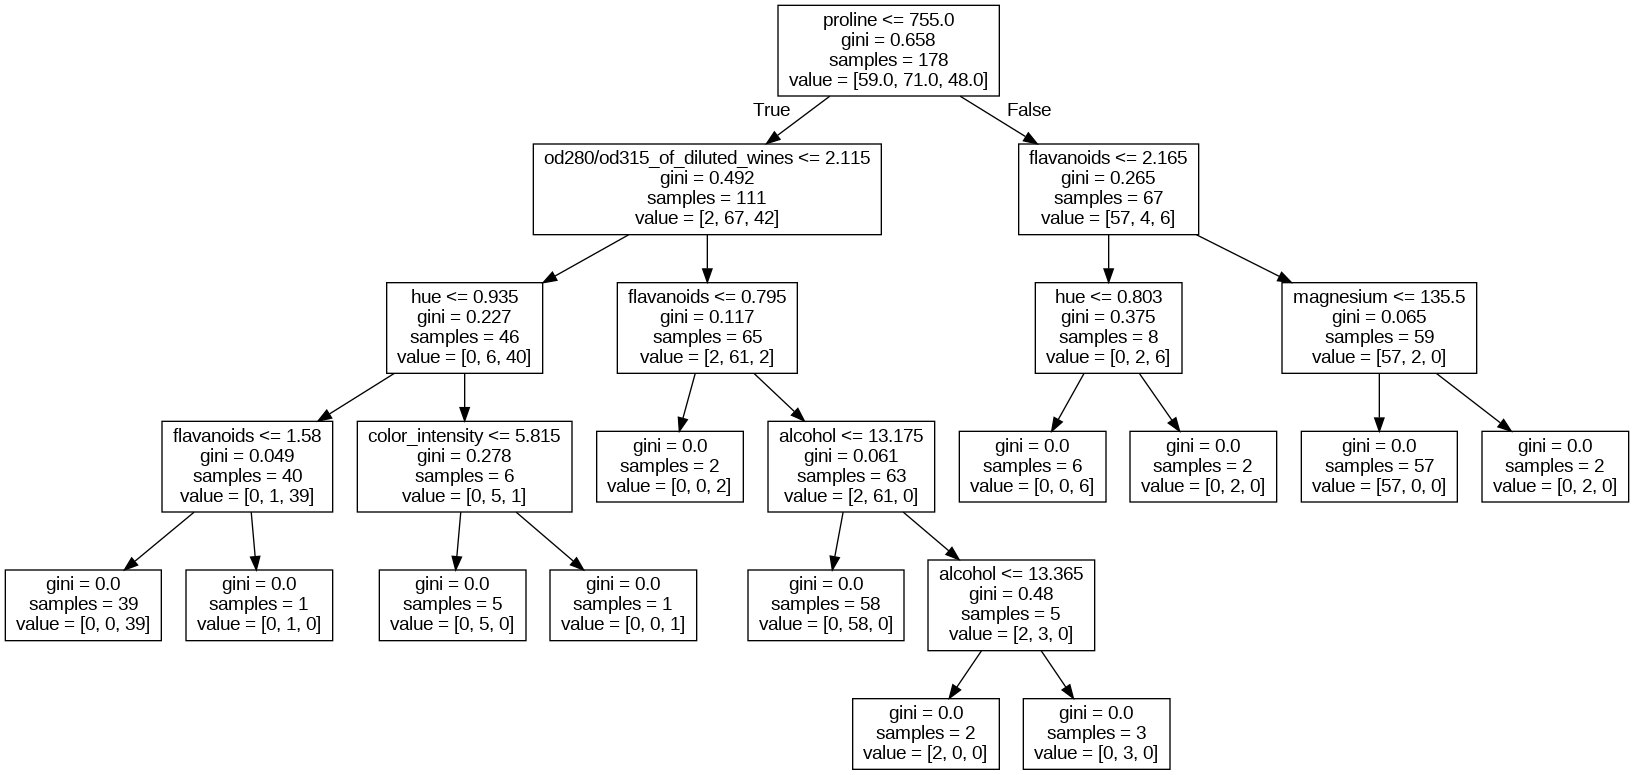

In [4]:
import pydot
from IPython . display import Image
from sklearn . tree import export_graphviz
# here , features is a list of names , one for each feature
# this makes the resulting tree visualization more comprehensible
dot_code = export_graphviz ( clf , feature_names = feature_names )
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

In [7]:
from  sklearn.metrics import accuracy_score,classification_report
y_pred = clf.predict(X)
accuracy = accuracy_score(y,y_pred)
print(accuracy)
#ofc accuracy is 1.0 because the test dataset is contained in the train so the model already saw everything

1.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100 ,"%")
print(classification_report(y_test,y_pred))

81.81818181818183 %
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        46
           1       0.91      0.88      0.89        58
           2       0.71      0.74      0.72        39

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



Best parameter choice

In [13]:
def parameters_testing(config):
  clf = DecisionTreeClassifier(**config)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy


In [14]:
from sklearn.model_selection import ParameterGrid
params = {
"max_depth" : [ None , 2 , 4 , 8] ,
"splitter" : [ "best" , "random" ]
}
for config in ParameterGrid ( params ) :
  print (f"Max depth: {config["max_depth"]}, Splitter: {config["splitter"]}. Accuracy: \t{parameters_testing(config)}" )

Max depth: None, Splitter: best. Accuracy: 	0.7692307692307693
Max depth: None, Splitter: random. Accuracy: 	0.8881118881118881
Max depth: 2, Splitter: best. Accuracy: 	0.8881118881118881
Max depth: 2, Splitter: random. Accuracy: 	0.7482517482517482
Max depth: 4, Splitter: best. Accuracy: 	0.8741258741258742
Max depth: 4, Splitter: random. Accuracy: 	0.8881118881118881
Max depth: 8, Splitter: best. Accuracy: 	0.8321678321678322
Max depth: 8, Splitter: random. Accuracy: 	0.8881118881118881
